In [16]:
import pandas as pd
import numpy as np
import cv2
import seaborn as sns

In [17]:
screening  = pd.read_csv("DataSet/Screening/data.csv")
screening.drop('Unnamed: 0', axis = 1, inplace= True)

In [18]:
x = screening.iloc[:,:-1]
y = screening.iloc[:,-1]

#### Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
x = scaler.fit_transform(x)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.1, random_state=42)

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l2')

In [24]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_train, y_train, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_train, y_train, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 93.53 (+/- 3.69) %
Recall 0.9920986216268686
Precision 0.9873200444412934
F1 0.9896594273579495


In [25]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [26]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print('Precision: ',precision_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 97.91183294663574
Precision:  0.9744680851063829
Mean Absolute Error: 0.02088167053364269
F1 Score:  0.9807280513918629
Confusion Matrix: 
[[193   6]
 [  3 229]]


<AxesSubplot:>

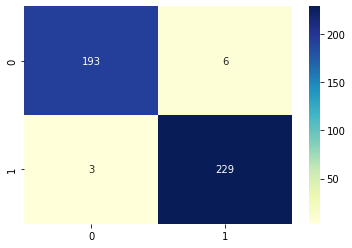

In [27]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

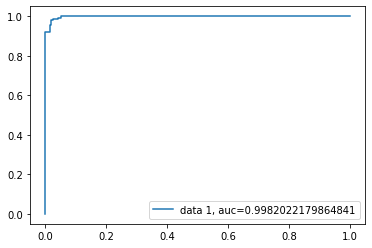

In [28]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

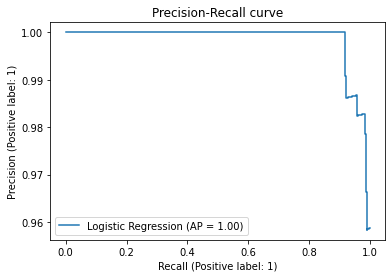

In [29]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, x_test, y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("Precision-Recall curve")

#### SVM/SVC

In [30]:
from sklearn.svm import SVC
clf = SVC(kernel= 'poly', probability= True)

In [31]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 94.44 (+/- 3.49) %
Recall 0.9454545454545455
Precision 0.9484848484848486
F1 0.9445078110295502


In [32]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [33]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print('Precision: ',precision_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 99.07192575406032
Precision:  0.9913793103448276
Mean Absolute Error: 0.009280742459396751
F1 Score:  0.9913793103448276
Confusion Matrix: 
[[197   2]
 [  2 230]]


<AxesSubplot:>

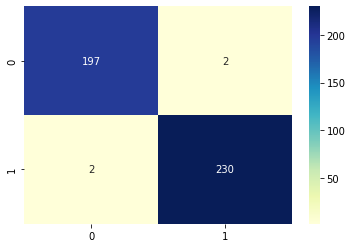

In [34]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

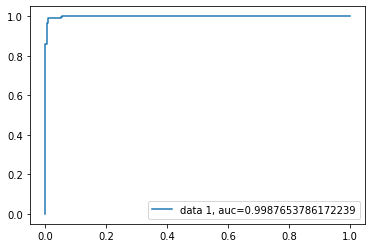

In [35]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

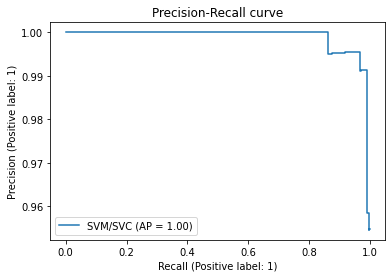

In [36]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, x_test, y_test, name="SVM/SVC"
)
_ = display.ax_.set_title("Precision-Recall curve")

#### KNN Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

In [38]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_valid, y_valid, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 90.30 (+/- 6.23) %
Recall 0.9090909090909092
Precision 0.9128621378621379
F1 0.9052842085450781


In [39]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [40]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print('Precision: ',precision_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 94.19953596287704
Precision:  0.9330543933054394
Mean Absolute Error: 0.058004640371229696
F1 Score:  0.9469214437367304
Confusion Matrix: 
[[183  16]
 [  9 223]]


<AxesSubplot:>

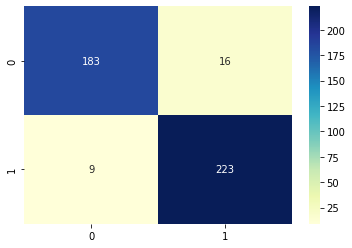

In [41]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

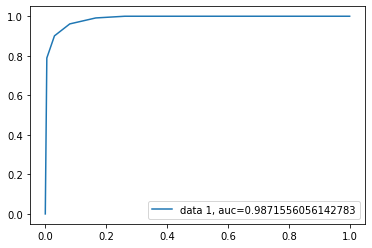

In [42]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

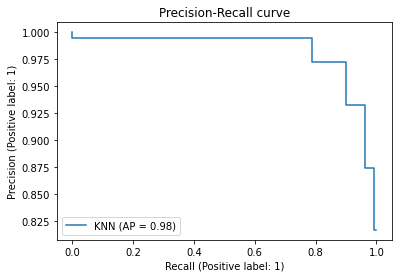

In [43]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, x_test, y_test, name="KNN"
)
_ = display.ax_.set_title("Precision-Recall curve")

#### Gaussian Naive Bayes 

In [44]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [45]:
print("Validation Scores:\n")
scores = cross_val_score(clf, x_valid, y_valid, cv = 10, scoring= 'accuracy')
print('Accuracy: {:.2f} (+/- {:.2f}) %'.format(scores.mean()*100, scores.std() *100))
recall = cross_val_score(clf, x_train, y_train, cv=10, scoring='recall')
print('Recall', np.mean(recall))
precision = cross_val_score(clf, x_train, y_train, cv=10, scoring='precision')
print('Precision', np.mean(precision))
f1 = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print('F1', np.mean(f1))

Validation Scores:

Accuracy: 87.01 (+/- 8.53) %
Recall 0.8744515628033392
Precision 0.8959804729700431
F1 0.8842871991863882


In [46]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [47]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print('Precision: ',precision_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: ")
cm_matrix = confusion_matrix(y_test, y_pred)
print(cm_matrix)

Accuracy: 88.63109048723898
Precision:  0.8961038961038961
Mean Absolute Error: 0.1136890951276102
F1 Score:  0.8941684665226782
Confusion Matrix: 
[[175  24]
 [ 25 207]]


<AxesSubplot:>

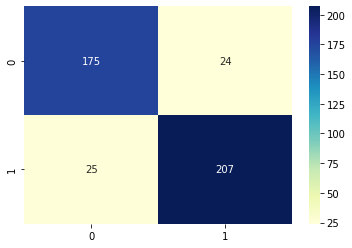

In [48]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

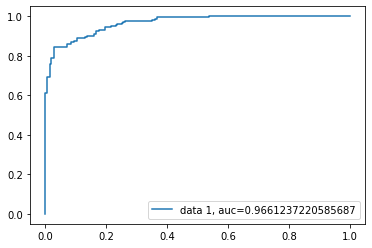

In [49]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

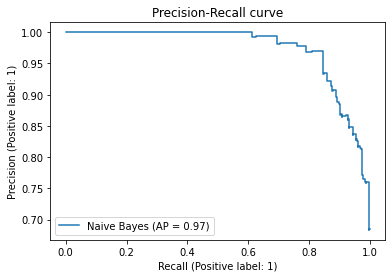

In [50]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, x_test, y_test, name="Naive Bayes"
)
_ = display.ax_.set_title("Precision-Recall curve")